# Osho Gnanasivam

## Research Question #1

**Initial:** Understanding the effect of different variables on the charges of medical coverage to find out a relationship between them.

**Second:** Between Smoking and Obesity, which factor contributes more to higher charges of medical coverage?

## Description of Variables

- **Age:** Age of primary beneficiary
- **Sex:** Insurance contractor gender: female, male
- **BMI:** Body Mass Index, used as an indicator of body health, weights that are relatively high or low relative to height, objective index of body              weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- **Children:** Number of children covered by health insurance / Number of dependents (of beneficiary)
- **Smoker:** Whether beneficiary smokes or not
- **Region:** the beneficiary's residential area in the US: northeast, southeast, southwest, northwest.
- **Charges:** Individual medical costs billed by health insurance

In [ ]:
import pandas as pd
import project_functions1 as pf 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Task 1 - EDA

In [ ]:
df = pf.load_and_process("../data/raw/raw_MC.csv")
display(df)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Task 2 - Analysis Pipeline 

## Checking for null-values ##

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**No null values** found in any column!

## Identifying Outliers and removing them from the dataframe ##

Total number of outliers are 7


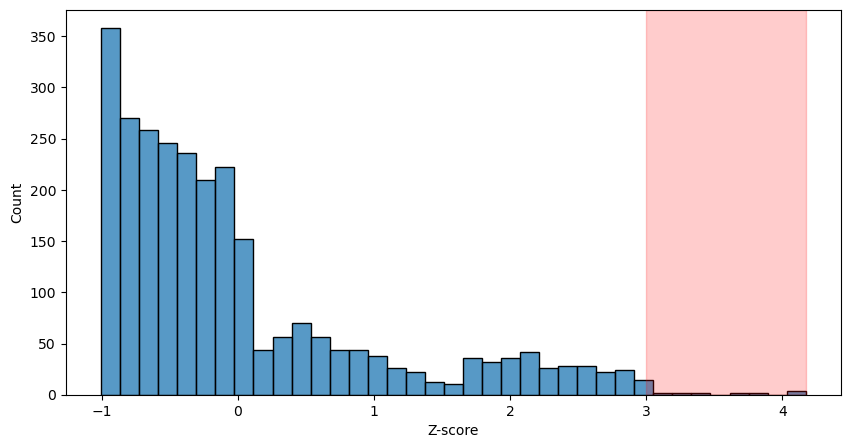

In [ ]:
pf.find_outliers(df.charges) #The part of the graph highlighted in red represents the outliers(skewed data outliers) in the value of charges
df = df[(df['charges'] < 3) | (df['charges'] > -3)] #Removes outliers that are not within the 99% confidence interval from dataset. Project_functions1.py for more stat info.

## Ranges and Unique Values in each column ##

In [ ]:
pf.rng_and_unqval(df)

Age Range: 18 to 64
BMI Range: 15.96 to 53.13
Unique values in "Children": [0 1 3 2 5 4]
Unique values in "Sex": ['female' 'male']
Unique values in "Smoker": ['yes' 'no']
Unique values in "Region": ['southwest' 'southeast' 'northwest' 'northeast']


**All values** are appropriate, accurate and there is no outright redundancy in them. They can be used for analysis.

## Correlation Matrix ##

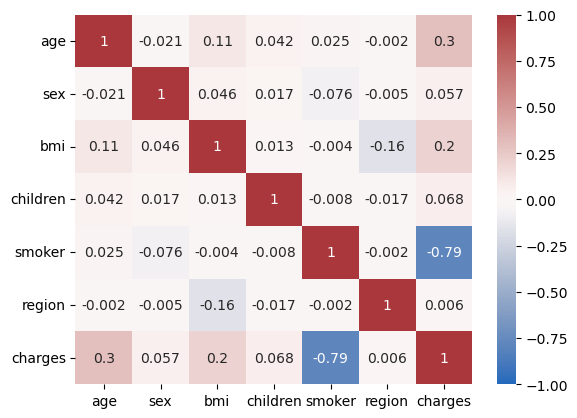

In [ ]:
df2 = pf.convert_catdata(df)
corr = df2.corr().round(3)
sns.heatmap(corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

### General correlations ###
- Smoking has a strong negative correlation with the insurance charges (Medical costs billed tend to be lower for beneficiaries who are non-smokers)
- Age has a slight positive correlation with the insurance charges (Medical costs billed tend to be higher for beneficiaries who are older)
- BMI has a slight positive correlation with the insurance charges (Medical costs billed tend to be higher for beneficiaries with a higher BMI)


## Age and Smoker against Charges

<seaborn.axisgrid.FacetGrid>

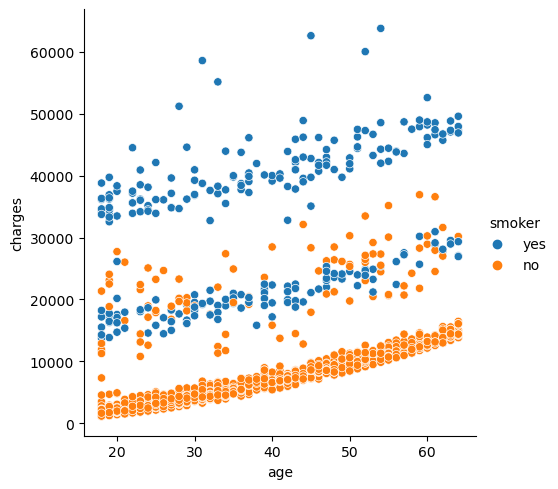

In [ ]:
sns.relplot(x = 'age', y = 'charges', hue = 'smoker', data = df)

## BMI>30(Obese) and Age against Charges ##

<seaborn.axisgrid.FacetGrid>

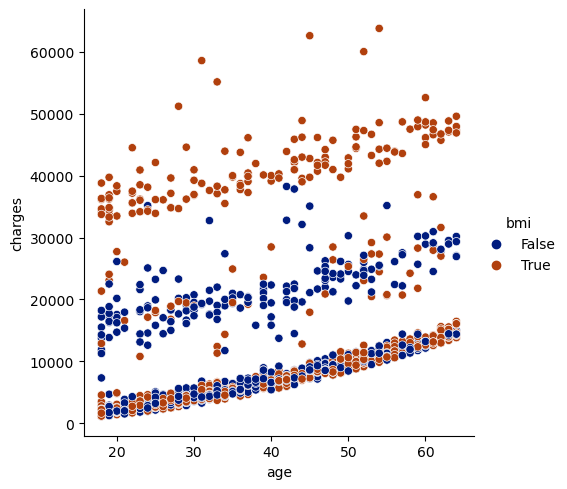

In [ ]:
sns.relplot(x = 'age', y = 'charges', hue = df['bmi']>30,palette = 'dark',data = df)

When comparing the points above the $30000 mark in both plots, it can be seen that these beneficiaries are both smokers and obese. This makes it unclear whether these high charges were a result of the smoking or obesity factor. As such, some data wrangling is required to classify the BMIs of the beneficiaries. We can the compare the charges of Obese non-smokers and Non-obese Smokers to figure out who pays more.

In [ ]:
pf.wrangle(df)
df #SMOB status = Smoker/Obesity status

,age,sex,bmi,children,smoker,region,charges,BMI_Class,SMOB Status
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,Non-obese Smoker
1,18,male,33.770,1,no,southeast,1725.55230,Obese,Obese non-smoker
2,28,male,33.000,3,no,southeast,4449.46200,Obese,Obese non-smoker
3,33,male,22.705,0,no,northwest,21984.47061,Normal Weight,NaN
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,NaN
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obese,Obese non-smoker
1334,18,female,31.920,0,no,northeast,2205.98080,Obese,Obese non-smoker
1335,18,female,36.850,0,no,southeast,1629.83350,Obese,Obese non-smoker
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight,NaN


## Comparing the two groups against charges

<AxesSubplot: xlabel='SMOB Status', ylabel='charges'>

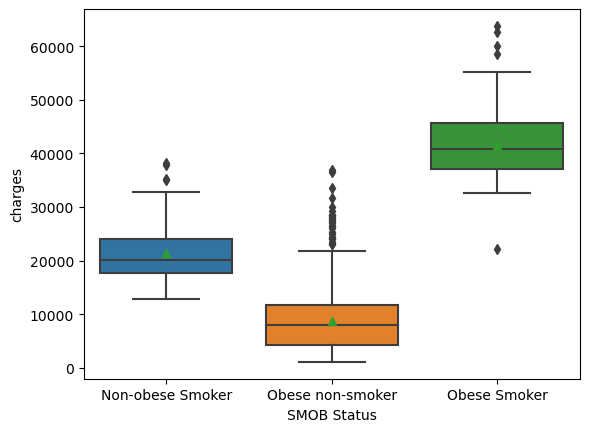

In [ ]:
sns.boxplot(df, x = 'SMOB Status', y ='charges', showmeans = True)

# Task 4 - Observations and Analysis


- There is a very obvious increase in medical charges claimed as the age of the beneficary rises. This is a very significant insight that can be observed from the Age and Smoking against Charges plot.
- It can also be observed that no smoking beneficiary had a claim of lesser than 10000 dollars regardless of age or any other key factor. It can be concluded from this dataset, that smokers tend to claim a higher amount in insurance coverages than their non-smoking counter-part.
- With reference to the BMI against Charges plot, it can be observed that a large cluster tends to be within the 0-15000 range while a few points can be observed to be dispersed towards a higher value of charges as BMI increases. This explains the smaller correlation value that BMI had on the Charges as seen in the correlation matrix. It is unclear whether a larger BMI would mean a greater insurance claim from this dataset and more data would be required for something definitive.
- Non-Obese smokers pay more than double the amount that obese non-smokers do, showing that smoking might have much more of an impact on higher medical charges than obesity. Unsurprisingly, beneficiaries who are both obese and smokers pay even more (nearly 40000 dollars on average!). We can conclude that both factors result in higher medical charges, however, smoking contributes more than obesity as a factor.
